In [ ]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn


def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

#  Ejercicio 1
El siguiente polinomio cúbico de interpolación se halló utilizando el método de interpolación de Newton
para los datos $(1, y_0)$, $(2, y_1)$, $(3, y_2)$ y $(4, y_3)$:
$$1 -2 (x - 1) + 3 (x - 1) (x - 2) -2 (x - 1) (x - 2) (x - 3)$$
- Encuentre $y_0$, $y_1$, $y_2$ y $y_3$.
- Determine el polinomio de interpolación que pasa por $(1, y_0)$, $(2, y_1)$, $(3, y_2)$, $(4, y_3)$ y $(5, -10)$.
- En un mismo plano cartesiano grafique los cinco puntos y el polinomio de interpolación.

In [27]:
f_1 = lambda x: 1 -2*(x - 1) + 3*(x - 1)*(x - 2) -2*(x - 1)*(x - 2)*(x - 3)
datos_x = [1, 2, 3, 4]
datos_y = f_1(np.array(datos_x)).tolist()
datos_y

[1, -1, 3, 1]

In [28]:
T, P = NewtonPol(list(zip(datos_x, datos_y)))
for line in T:
    print(line)

[1, 0, 0, 0]
[-1, -2.0, 0, 0]
[3, 4.0, 3.0, 0]
[1, -2.0, -3.0, -2.0]


In [29]:
datos_x.append(5)
datos_y.append(-10)
T, P = NewtonPol(list(zip(datos_x, datos_y)))
for line in T:
    print(line)

[1, 0, 0, 0, 0]
[-1, -2.0, 0, 0, 0]
[3, 4.0, 3.0, 0, 0]
[1, -2.0, -3.0, -2.0, 0]
[-10, -11.0, -4.5, -0.5, 0.375]


Polinomio de interpolación de Newton: $p(x) = 1 -2 (x - 1) + 3 (x - 1) (x - 2) -2 (x - 1) (x - 2) (x - 3) + 0.375(x-1)(x-2)(x-3)(x-4)$

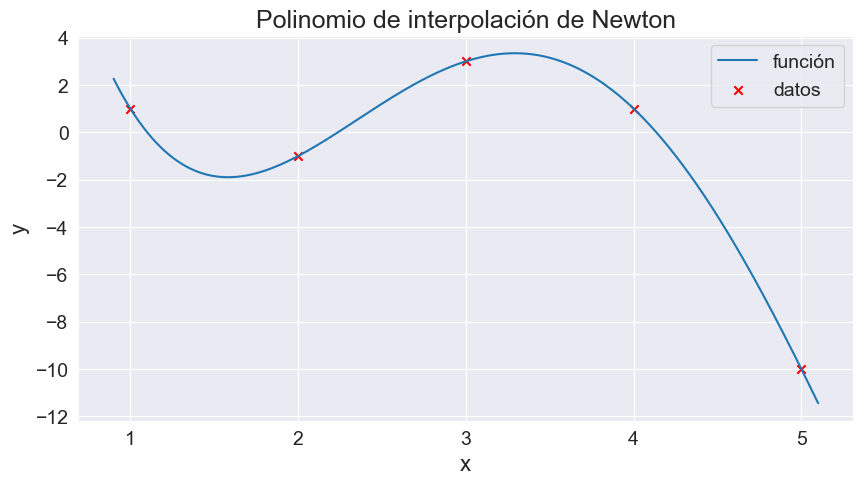

In [31]:
p_newt = lambda x: 1 -2*(x - 1) + 3*(x - 1)*(x - 2) -2*(x - 1)*(x - 2)*(x - 3) + 0.375*(x-1)*(x-2)*(x-3)*(x-4)
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(0.9, 5.1, 1000)

plt.plot(x0, p_newt(x0), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()

# Ejercicio 2
 Completar la siguiente tabla de diferencias divididas y encontrar el polinomio interpolador de Newton
 $$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & 4 &&&\\
	2 & ? & 1&&\\
	1 & ? & ? & -2&\\
	-2 & ? & ? & ? & -3 \\
\end{array}
$$

En un mismo plano cartesiano grafique los cuatro puntos y el polinomio de interpolación.

In [33]:
f_2 = lambda x: 4 + (x + 1) - 2*(x + 1)*(x - 2) - 3*(x + 1)*(x - 2)*(x - 1)
datos_x = [-1, 2, 1, -2]
datos_y = f_2(np.array(datos_x)).tolist()
datos_y

[4, 7, 10, 31]

In [34]:
T, P = NewtonPol(list(zip(datos_x, datos_y)))
for line in T:
    print(line)

[4, 0, 0, 0]
[7, 1.0, 0, 0]
[10, -3.0, -2.0, 0]
[31, -7.0, 1.0, -3.0]


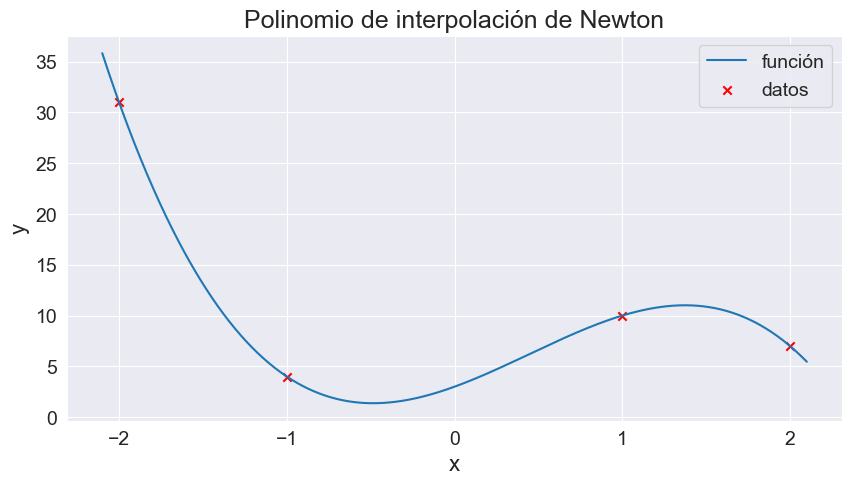

In [35]:
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(-2.1, 2.1, 1000)

plt.plot(x0, f_2(x0), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()

# Ejercicio 3
Completar la siguiente tabla de diferencias divididas y encontrar el polinomio interpolador de Newton

$$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & ? &&&\\
	2 & 4 & 1&&\\
	? & 2 & ? & ?&\\
	-2 & -1 & 1 & \frac{1}{4} & ? \\
\end{array}
$$

En un mismo plano cartesiano grafique los cuatro puntos y el polinomio de interpolación.

si $1 = \dfrac{4-y_0}{2 - (-1)}$ entonces $y_0 = 1$
$$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & 1 &&&\\
	2 & 4 & 1&&\\
	? & 2 & ? & ?&\\
	-2 & -1 & 1 & \frac{1}{4} & ? \\
\end{array}
$$

si $1 = \dfrac{-1 - 2}{-2 - x_2}$ entonces $x_2 = 1$
$$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & 1 &&&\\
	2 & 4 & 1&&\\
	1 & 2 & ? & ?&\\
	-2 & -1 & 1 & \frac{1}{4} & ? \\
\end{array}
$$

$f[x_1, x_2] = \dfrac{4 - 2}{2 - 1} = 2$
$$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & 1 &&&\\
	2 & 4 & 1&&\\
	1 & 2 & 2 & ?&\\
	-2 & -1 & 1 & \frac{1}{4} & ? \\
\end{array}
$$

$f[x_0, x_1, x_2] = \dfrac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0} = \dfrac{2 - 1}{1 - (-1)} = \dfrac{1}{2}$
$$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & 1 &&&\\
	2 & 4 & 1&&\\
	1 & 2 & 2 & 1/2&\\
	-2 & -1 & 1 & \frac{1}{4} & ? \\
\end{array}
$$

$f[x_0, x_1, x_2, x_3] = \dfrac{f[x_1, x_2, x_3] - f[x_0, x_1, x_2]}{x_3 - x_0} = \dfrac{1/4 - 1/2}{-2 - (-1)} = \dfrac{1}{4}$
$$
\begin{array}{|c|c|c|c|c|}

	x &y = \Delta^0 & \Delta^1 & \Delta^2 & \Delta^3 \\

	-1 & 1 &&&\\
	2 & 4 & 1&&\\
	1 & 2 & 2 & 1/2&\\
	-2 & -1 & 1 & \frac{1}{4} & 1/4 \\
\end{array}
$$

In [38]:
datos_x, datos_y = [-1, 2, 1, -2], [1, 4, 2, -1]

T, P = NewtonPol(list(zip(datos_x, datos_y)))
for line in T:
    print(line)

[1, 0, 0, 0]
[4, 1.0, 0, 0]
[2, 2.0, 0.5, 0]
[-1, 1.0, 0.25, 0.25]


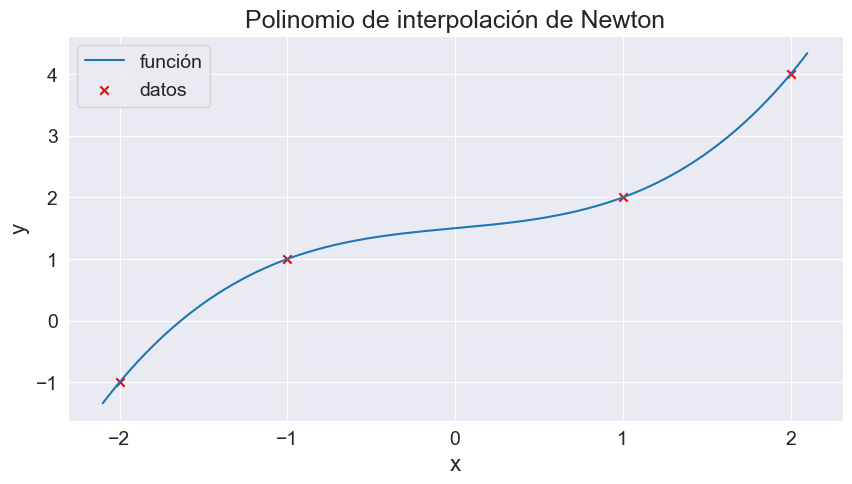

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(-2.1, 2.1, 1000)

plt.plot(x0, P(x0), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()

# Ejercicio 4
- Interpole la función
$$f(x) = \dfrac{1}{(1+12x)^2}$$
en 14 valores uniformemente espaciados en el intervalo $[-1, 1]$. Luego, grafique el polinomio obtenido, los datos interpolados y la función original. ¿Qué conclusión puede obtener a partir de los resultados obtenidos?
- Repita el ejercicio aumentado los valores del eje $x$ en el mismo intervalo. ¿Qué conclusión puede obtener a partir de los resultados obtenidos?

In [4]:
f_4 = lambda x: 1/(1+12*x)**2
datos_x = np.linspace(-1,1,14)
datos_y = f_4(datos_x)
print(list(datos_x)) # 14 valores uniformemente espaciados
print(list(datos_y))
T, P = NewtonPol(list(zip(datos_x, datos_y)))

[-1.0, -0.8461538461538461, -0.6923076923076923, -0.5384615384615384, -0.3846153846153846, -0.23076923076923073, -0.07692307692307687, 0.0769230769230771, 0.23076923076923084, 0.3846153846153846, 0.5384615384615385, 0.6923076923076925, 0.8461538461538463, 1.0]
[0.008264462809917356, 0.011934185438881436, 0.01872576177285319, 0.03352509422733584, 0.07650520597555456, 0.31947069943289247, 168.9999999999973, 0.2703999999999994, 0.07038733860891291, 0.031713267029461444, 0.01796152619832075, 0.01154292739566969, 0.008038049940546965, 0.005917159763313609]


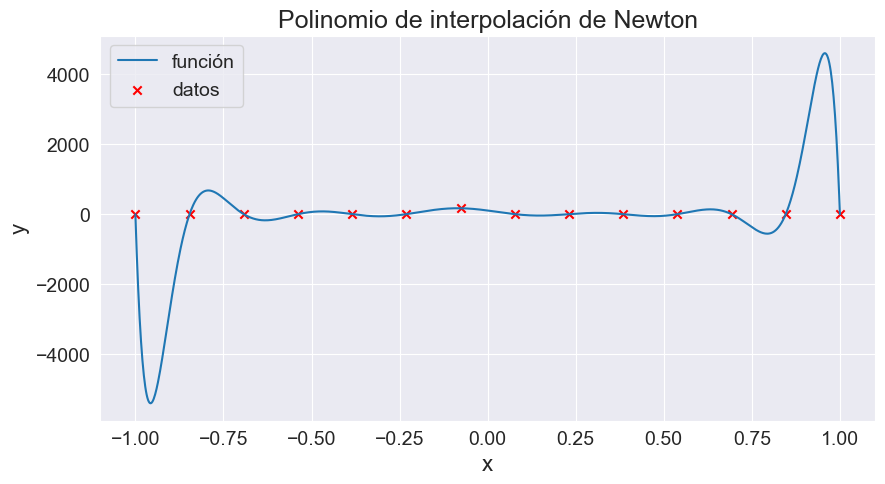

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(-1, 1, 1000)

plt.plot(x0, P(x0), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [25]:
f_4 = lambda x: 1/(1+12*x)**2
datos_x = np.linspace(-1,1,21)
datos_y = f_4(datos_x)
print(list(datos_x)) # 14 valores uniformemente espaciados
print(list(datos_y))
T, P = NewtonPol(list(zip(datos_x, datos_y)))

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.3999999999999999, -0.29999999999999993, -0.19999999999999996, -0.09999999999999998, 0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8, 0.9000000000000001, 1.0]
[0.008264462809917356, 0.010412328196584754, 0.013520822065981607, 0.018261504747991243, 0.02601456815816858, 0.04, 0.0692520775623269, 0.14792899408284033, 0.5102040816326535, 25.000000000000064, 1.0, 0.2066115702479337, 0.08650519031141858, 0.04725897920604914, 0.029726516052318647, 0.02040816326530612, 0.014872099940511595, 0.011317338162064277, 0.008899964400142396, 0.007181844297615627, 0.005917159763313609]


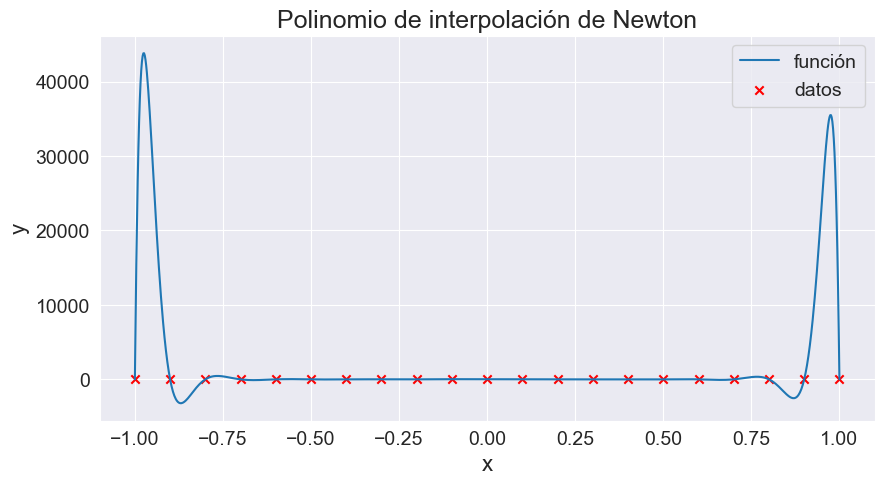

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(-1, 1, 1000)

plt.plot(x0, P(x0), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()